In [1]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

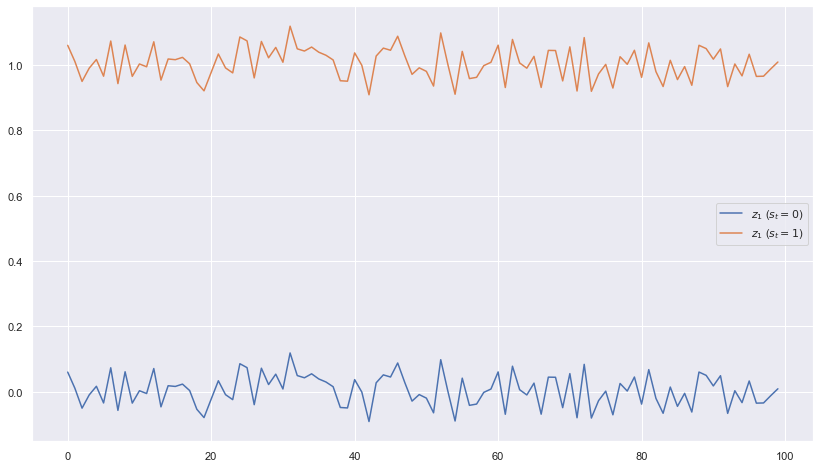

In [3]:
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
s = np.random.binomial(n=1, p=0.8, size=100)
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps
plt.figure(figsize=(14,8))
plt.plot(z1, label='$z_1$ ($s_t = 0$)')
plt.plot(z2, label='$z_1$ ($s_t = 1$)')
plt.legend()
plt.show()

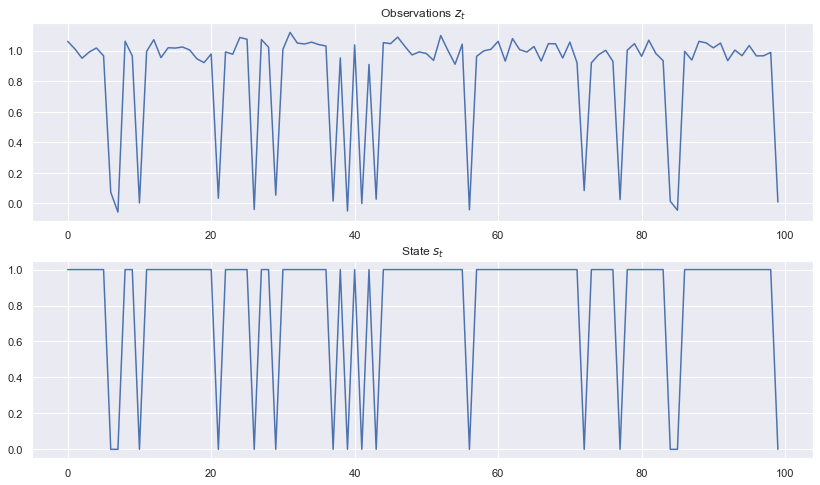

In [4]:
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])
        
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()        

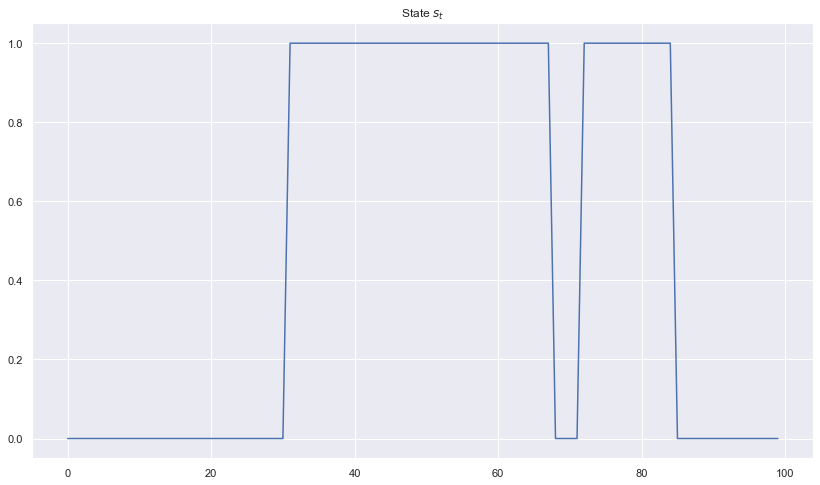

In [5]:
# 1. Генерирование марковской цепи с 2 скрытыми состояниями
P = np.array([
    [0.95, 0.05],
    [0.05, 0.95],
])
s = [0]
for t in range(99):
    distribution = P[s[-1]]
    s.append(np.random.choice([0, 1], p=distribution))

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
axs.plot(s)
axs.set_title('State $s_t$')
plt.show()

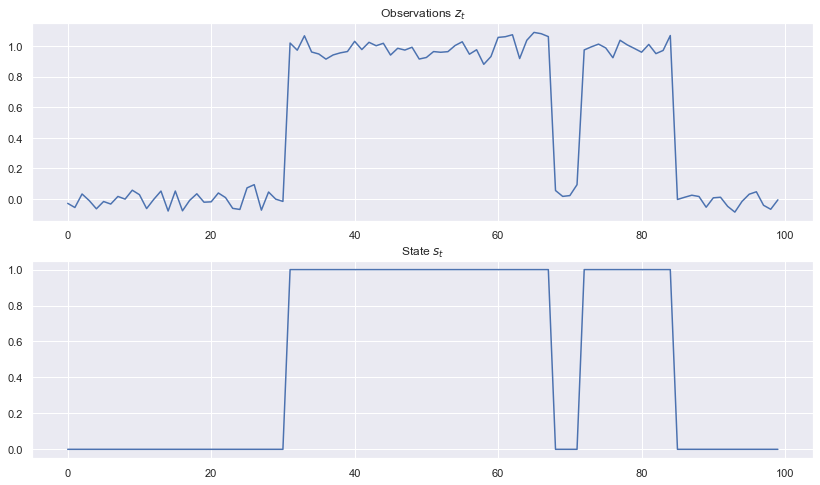

In [6]:
# 2. Генерирование наблюдений из распределений, обусловленных ненаблюдаемым состоянием
eps = np.random.normal(size=100)
alpha_0 = 0.
alpha_1 = 1.
beta = .05
z1 = alpha_0 + beta * eps
z2 = alpha_0 + alpha_1 + beta * eps
z = []
for t, s_t in enumerate(s):
    if s_t == 0:
        z.append(z1[t])
    else:
        z.append(z2[t])
        
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
axs[0].plot(z)
axs[0].set_title('Observations $z_t$')
axs[1].plot(s)
axs[1].set_title('State $s_t$')
plt.show()        

No handles with labels found to put in legend.


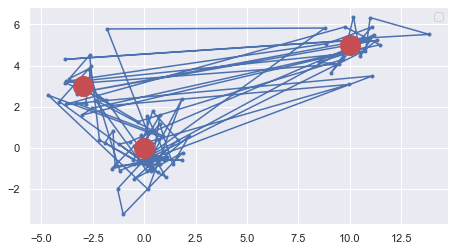

In [8]:
#генерирация траектории со скрытой марковской модели
import numpy as np
from hmmlearn import hmm
np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(X[:, 1], X[:, 0], '.-')
_ = axs.plot(model.means_[:, 1], model.means_[:, 0], 'ro', ms=20)
_ = axs.legend()
axs.set_aspect('equal')

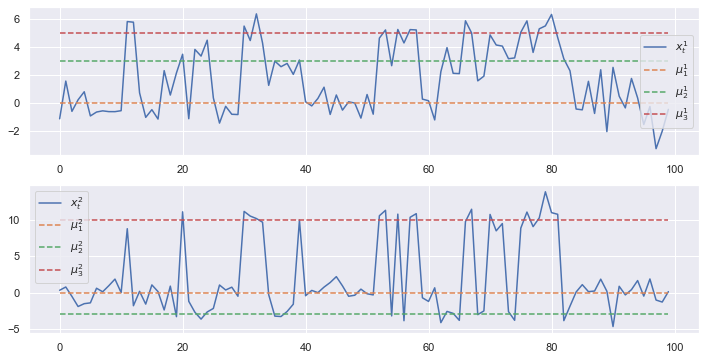

In [9]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
_ = axs[0].plot(X[:, 0], label='$x^1_t$')
for i in range(3):
    _ = axs[0].plot(range(len(X)), model.means_[i, 0] * np.ones(len(X)), '--', label='$\mu^1_{}$'.format(i+1))
_ = axs[0].legend()

_ = axs[1].plot(X[:, 1], label='$x^2_t$')
for i in range(3):
    _ = axs[1].plot(range(len(X)), model.means_[i, 1] * np.ones(len(X)), '--', label='$\mu^2_{}$'.format(i+1))
_ = axs[1].legend()

In [12]:
#Прогноз
from hmmlearn.hmm import GaussianHMM
data = pd.read_excel('нефть-brent 2010-2019.xlsx')['Value']
data.head(5)


0    58.84
1    59.19
2    60.37
3    59.84
4    59.59
Name: Value, dtype: float64

In [13]:
values = data.values.reshape(-1,1)
values

array([[58.84],
       [59.19],
       [60.37],
       ...,
       [76.57],
       [76.89],
       [76.37]])

In [14]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -12508.761143817197
2 -9850.143471727108
3 -9024.521702805836
4 -8491.334882342002
5 -8054.862663040987
6 -7678.231133782907
7 -7402.261265508386
8 -7064.69223966958
9 -6680.793475846602
10 -6615.936313202853
11 -6272.297357633872
12 -6081.052676703441
13 -5868.597158163063


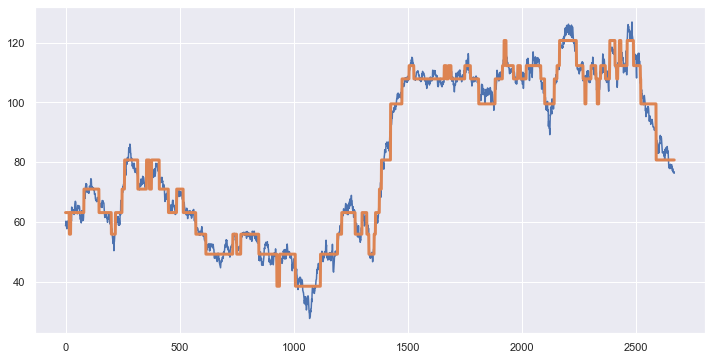

In [15]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [16]:
model.transmat_.shape

(10, 10)

In [17]:
print(model.transmat_)

[[9.81535171e-001 0.00000000e+000 1.39338891e-138 0.00000000e+000
  0.00000000e+000 5.93997645e-003 0.00000000e+000 0.00000000e+000
  1.25248528e-002 0.00000000e+000]
 [0.00000000e+000 9.64413082e-001 0.00000000e+000 0.00000000e+000
  3.59846344e-066 0.00000000e+000 3.55869176e-002 2.12893081e-093
  0.00000000e+000 0.00000000e+000]
 [6.09239309e-139 0.00000000e+000 9.73489920e-001 3.05054485e-139
  0.00000000e+000 1.84847600e-229 0.00000000e+000 0.00000000e+000
  1.47977567e-002 1.17123232e-002]
 [0.00000000e+000 0.00000000e+000 4.22162254e-138 9.83003387e-001
  6.86918098e-300 0.00000000e+000 0.00000000e+000 4.42341699e-003
  0.00000000e+000 1.25731962e-002]
 [0.00000000e+000 8.11568945e-019 0.00000000e+000 1.45927136e-303
  9.55367190e-001 0.00000000e+000 3.10231942e-002 1.36096163e-002
  0.00000000e+000 0.00000000e+000]
 [1.81412564e-002 0.00000000e+000 5.99692258e-235 0.00000000e+000
  0.00000000e+000 9.81858744e-001 0.00000000e+000 0.00000000e+000
  7.09541090e-095 0.00000000e+000